In [ ]:
!pip install seaborn # Para hacer gráficos
!pip install sklearn # Provee herramientas para hacer modelos de datos (Modelos lineales, clasificadores, etc)

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\julia\anaconda3\envs\TIN\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
from sklearn.datasets import load_boston
# Simil al package MAAS en R 
boston_dataset = load_boston()

In [3]:
# Los conjuntos de datos disponibles en el repositorio de sklearn 
# están estructurados de la siguiente manera
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


    - data: contains the information for various houses
    - target: prices of the house
    - feature_names: names of the features
    - DESCR: describes the dataset

In [4]:
# Veamos la descripción del dataset
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# Como se hará complicado usar el objeto "boston_dataset", creamos un dataFrame de Pandas
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


    - crim: ratio de criminalidad per cápita de cada ciudad.
    - zn: Proporción de zonas residenciales con edificaciones de más de 25.000 pies cuadrados.
    - indus: proporción de zona industrializada.
    - chas: Si hay río en la ciudad (= 1 si hay río; 0 no hay).
    - nox: Concentración de óxidos de nitrógeno (partes per 10 millón).
    - rm: promedio de habitaciones por vivienda.
    - age: Proporción de viviendas ocupadas por el propietario construidas antes de 1940.
    - dis: Media ponderada de la distancias a cinco centros de empleo de Boston.
    - rad: Índice de accesibilidad a las autopistas radiales.
    - tax: Tasa de impuesto a la propiedad en unidades de USD 10,000.
    - ptratio: ratio de alumnos/profesor por ciudad.
    - B: 1000(Bk - 0.63)^2 donde Bk es la proporción de gente de color(descendientes afroamericanos) por ciudad.
    - lstat: porcentaje de población en condición de pobreza.
    - medv: Valor mediano de las casas ocupadas por el dueño en unidades de USD 1000.

In [6]:
# Agrego la columna correspondiente a nuestro objetivo de prediccoón o target
# Para agregar una columna 
boston['MEDV'] = boston_dataset.target

In [7]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
#NO CORRER PRODUCE ERROR
# si quisiera ordenar diferente las columnas
#boston = boston[['MEDV', 'CRIM', 'ZN']] # Debes agregar todas las columnas a considerar
#boston.head()

## Preprocesamiento de datos

In [8]:
# Verificar si existen registros nulos
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Análisis exploratorio de datos

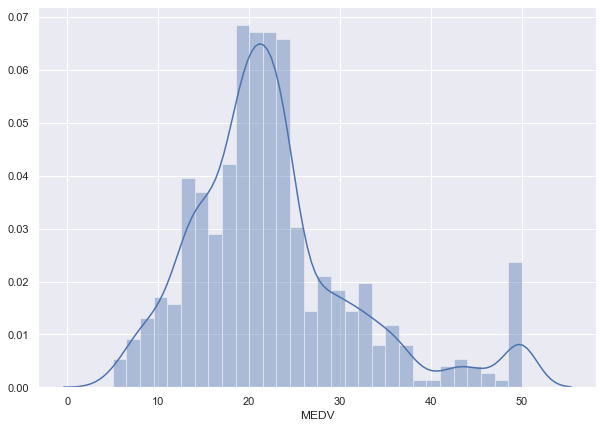

In [9]:
# Revisamos como se distribuye la variable de respuesta (en este caso, el precio promedio de la vivienda)
sns.set(rc={'figure.figsize':(10,7)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

    - Podemos ver que se distribuye "normal", con ciertos valores atípicos 

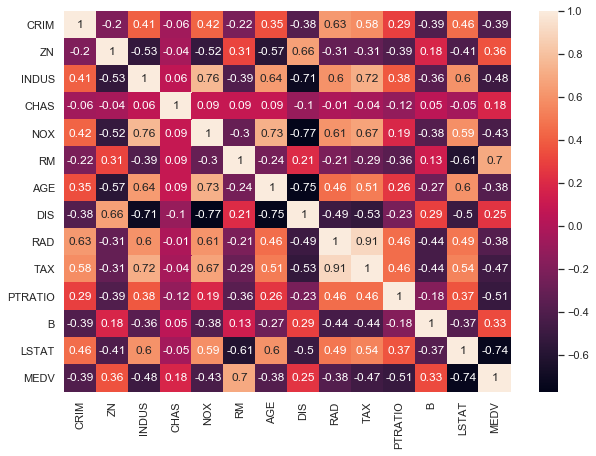

In [10]:
# Si analizamos la correlación entre las variables
correlation_matrix = boston.corr().round(2)
# annot = True # to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

#### Si nos centramos en la variable de respuesta (MDEV), la variable que tiene mayor correlación con ella es LSTAT 

- La correlación existente entre LSTAT y MDEV es negativa de un -0.74 
- Otra correlación alta es la de RM, siendo positiva de 0.7 

#### Un punto importante a la hora de efectuar un modelo de regresión lineal, es verificar la colinealidad de los datos

- Si observamos bien, las variables RAD y TAX poseen un correlación de un 0.91, lo cual es muy alto. 
- A la hora de generar el modelo, no es recomendable tener ambas variables siendo parte de nuestro set de modelamiento <br> (Por criterio de parsimonia: "El modelo más simple, siempre es mejor")
- De acuerdo al mismo criterio, observar las variables AGE y DIS (correlación de un -0.75)

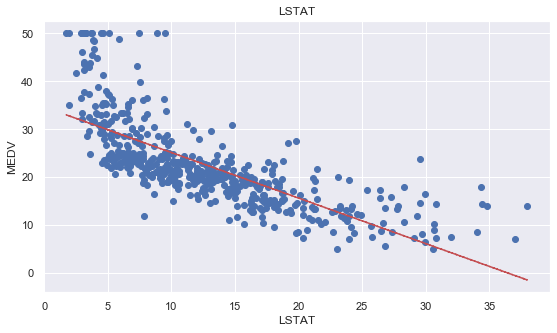

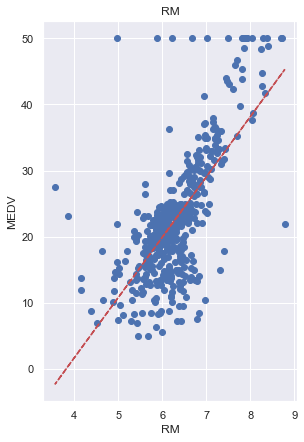

In [43]:
# En base a las observaciones anteriores, consideraremos RM y LSTAT como nuestras características. 
# Al usar un diagrama de dispersión, veamos cómo varían estas características con MEDV.

plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')
    
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--")

    plt.show()

#### Observaciones:

    - Los precios aumentan a medida que el valor de RM aumenta linealmente. Hay pocos valores atípicos y los datos parecen estar limitados a 50.
    - Los precios tienden a disminuir con un aumento en LSTAT. Aunque no parece estar siguiendo exactamente una línea lineal.

## Preparando los datos para el entrenamiento del modelo Lineal

In [12]:
# Hacemos uso del comenado np.c porvisto por el package de numpy
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [13]:
X

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147
...,...,...
501,9.67,6.593
502,9.08,6.120
503,5.64,6.976
504,6.48,6.794


In [14]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

### Dividiendo los datos en conjuntos de entrenamiento y prueba

In [15]:
from sklearn.model_selection import train_test_split
# Una proporción "ideal", muy citada en la literatura es de 70 - 30 %
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [16]:
# Entrenando y probando el modelo 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_model = LinearRegression()
# Simil de model.fit en R es lim(data ~ predictor)
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# Evaluación del modelo
# Podemos evaluar usando RMSE y R^2 

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186954


In [18]:
## Usando más variables
# Hacemos uso del comenado np.c porvisto por el package de numpy
X = pd.DataFrame(np.c_[boston['CRIM'], boston['ZN'], boston['INDUS'], boston['CHAS'], boston['RM'], boston['AGE'],
                      boston['RAD'], boston['PTRATIO'], boston['B'], boston['LSTAT']], 
                 columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'RAD', 'PTRATIO', 'B', 'LSTAT'])
Y = boston['MEDV']

# crim + zn  + indus + chas + rm + age + rad + ptratio + black + lstat

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 10)
(102, 10)
(404,)
(102,)


In [20]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# Evaluación del modelo
# Podemos evaluar usando RMSE y R^2 

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.061335099958455
R2 score is 0.7017857187948404


The model performance for testing set
--------------------------------------
RMSE is 5.025273639438634
R2 score is 0.6774539875325446


In [22]:
# Igualando el modelo generado por Malen el día de ayer
# crim  + chas + rm + rad + ptratio + black + lstat 
X = pd.DataFrame(np.c_[boston['CRIM'], boston['CHAS'], boston['RM'], boston['RAD'], boston['PTRATIO'], 
                       boston['B'], boston['LSTAT']], 
                 columns = ['CRIM', 'CHAS', 'RM', 'RAD', 'PTRATIO', 'B', 'LSTAT'])
Y = boston['MEDV']

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 7)
(102, 7)
(404,)
(102,)


In [24]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
# Evaluación del modelo
# Podemos evaluar usando RMSE y R^2 

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.074443121462974
R2 score is 0.7002390671842748


The model performance for testing set
--------------------------------------
RMSE is 5.008309418728993
R2 score is 0.6796280009045244


# Como tarea 

- Investigar el cómo calcular significancia de variables para regresión lineal en Python (usando sklearn)

In [27]:
from sklearn.datasets import load_boston
# Simil al package MAAS en R 
boston_dataset = load_boston()
import statsmodels.api as sm

In [99]:
import statsmodels.api as sm
X = X_train
y = Y_train

X2 = sm.add_constant(X)
est = sm.OLS(y,X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     132.2
Date:                Sat, 04 Apr 2020   Prob (F-statistic):           1.76e-99
Time:                        20:25:01   Log-Likelihood:                -1229.4
No. Observations:                 404   AIC:                             2475.
Df Residuals:                     396   BIC:                             2507.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.4863      4.866      3.593      0.0